In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
#seaborn is a visulization for pandas
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime
# Importing Classifier Modules

#######################################################
#Classifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC, LinearSVC
#from sklearn.neighbors import KNeighborsClassifier #KNN
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#######################################################

#######################################################
#Regressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
#######################################################

In [2]:
#Split a df into train data and test data

def SplitDataset(dfSample,rate=0.80):
    X,y=dfSample.drop(['Total'],axis=1),dfSample['Total']
    train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=rate, test_size=(1-rate))
    split_List=[train_X, test_X, train_y, test_y]
    return split_List

#Train the model and get the scores
def TrainAndGetScores_RMSPE(DataSetList,model):
    classifier = model
    classifier.fit(DataSetList[0], DataSetList[2])
    Rm=classifier.predict(DataSetList[1])
    return [classifier,RMSPE(Rm, DataSetList[3])]

#Return the after trained data
def Train_Model_list(DataSetListT,Model_should_be_trained):
    AfterTrainedModel=[]
    for i in range(0,len(Model_should_be_trained)):
        AfterTrainedModel.append(TrainAndGetScores(DataSetListT,Model_should_be_trained[i]))
    return AfterTrainedModel

#Return the score of each model with graph
##############################Point Plot##############################
def GetModelGraph(TrainedModellist):
    listScore=[]
    listModel=[]
    for i in range(0,len(TrainedModellist)):
        listScore.append(TrainedModellist[i][1])
    for i in range(0,len(TrainedModellist)):
        #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
        #listModel.append(str(TrainedModellist[i][0])[0:5])
        listModel.append(str(TrainedModellist[i][0])[0:5])
    sns.pointplot(x=listModel, y=listScore);
##############################Point Plot##############################
    
def RMSPE(pred_demand,actual_demand):
    return(np.sqrt(np.average((pred_demand-actual_demand)**2)))
    

In [3]:
#Return the after trained data with N Trails
##############################Cross Validation##############################
def Train_Model_list_NTrainSet(dfSample, rate, Model_should_be_trained, n=100):
    
    
    
    AfterTrainedModelMean=[]
    for j in range(0,n):
        X,y=dfSample.drop(['NWeekly_Gross'],axis=1),dfSample['NWeekly_Gross']
        train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=rate, test_size=(1-rate))
        DataSetListT=[train_X, test_X, train_y, test_y]
        AfterTrainedModel=[]
        for i in range(0,len(Model_should_be_trained)):
            AfterTrainedModel.append(TrainAndGetScores_RMSPE(DataSetListT,Model_should_be_trained[i]))
        AfterTrainedModelMean.append(AfterTrainedModel)
    ReturnMean=[]
    for i in range (0,len(Model_should_be_trained)):
        mean=[]
        for j in range(0,n):
            mean.append(AfterTrainedModelMean[j][i][1])
        ReturnMean.append([AfterTrainedModelMean[0][i][0],np.mean(mean)])
    
    
  #  ReturnMean=[[AfterTrainedModelMean[0][mod][0],
   #              np.mean(AfterTrainedModelMean[num][mod][1] for num in range(0,n) for mod in range(0,len(Model_should_be_trained)))] for mod in range(0,len(Model_should_be_trained)) ]
    
    return ReturnMean

In [4]:
revenue_cleanned=pd.read_csv('Movie_NormPCAFinal File_V3.csv',encoding = "ISO-8859-1")

In [5]:
revenue_cleanned.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Movie_Name,Week_Number,Year,Month,Day,Revenue,NGross_to_Date,NWeekly_Gross
0,0,-0.643765,-0.353895,0.188243,-0.526726,0.109456,-0.040500,-0.716574,0.125703,0.237249,-0.867337,10 Cloverfield Lane,-7,2016,1,15,71.9,0.0,0.0
1,1,-0.643714,-0.353810,0.187965,-0.526875,0.109262,-0.040846,-0.716380,0.125832,0.237146,-0.867022,10 Cloverfield Lane,-6,2016,1,22,71.9,0.0,0.0
2,2,-0.643716,-0.353814,0.187976,-0.526869,0.109270,-0.040832,-0.716388,0.125827,0.237150,-0.867035,10 Cloverfield Lane,-5,2016,1,29,71.9,0.0,0.0
3,3,-0.643878,-0.354084,0.188862,-0.526395,0.109886,-0.039731,-0.717004,0.125414,0.237479,-0.868037,10 Cloverfield Lane,-4,2016,2,5,71.9,0.0,0.0
4,4,-0.644287,-0.354768,0.191101,-0.525199,0.111443,-0.036950,-0.718561,0.124370,0.238309,-0.870569,10 Cloverfield Lane,-3,2016,2,12,71.9,0.0,0.0


In [6]:
df=revenue_cleanned.drop(['Movie_Name','Unnamed: 0', 'Revenue', 'NGross_to_Date' ],axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19046 entries, 0 to 19045
Data columns (total 15 columns):
0                19046 non-null float64
1                19046 non-null float64
2                19046 non-null float64
3                19046 non-null float64
4                19046 non-null float64
5                19046 non-null float64
6                19046 non-null float64
7                19046 non-null float64
8                19046 non-null float64
9                19046 non-null float64
Week_Number      19046 non-null int64
Year             19046 non-null int64
Month            19046 non-null int64
Day              19046 non-null int64
NWeekly_Gross    19046 non-null float64
dtypes: float64(11), int64(4)
memory usage: 2.2 MB


In [8]:
df3=df
df3['Month'] = df3['Month'].astype(object)
df3['Year'] = df3['Year'].astype(object)
df3['Day'] = df3['Day'].astype(object)
df3['Week_Number'] = df3['Week_Number'].astype(object)


In [9]:
df3

,0,1,2,3,4,5,6,7,8,9,Week_Number,Year,Month,Day,NWeekly_Gross
0,-0.643765,-0.353895,0.188243,-0.526726,0.109456,-0.040500,-0.716574,0.125703,0.237249,-0.867337,-7,2016,1,15,0.000000
1,-0.643714,-0.353810,0.187965,-0.526875,0.109262,-0.040846,-0.716380,0.125832,0.237146,-0.867022,-6,2016,1,22,0.000000
2,-0.643716,-0.353814,0.187976,-0.526869,0.109270,-0.040832,-0.716388,0.125827,0.237150,-0.867035,-5,2016,1,29,0.000000
3,-0.643878,-0.354084,0.188862,-0.526395,0.109886,-0.039731,-0.717004,0.125414,0.237479,-0.868037,-4,2016,2,5,0.000000
4,-0.644287,-0.354768,0.191101,-0.525199,0.111443,-0.036950,-0.718561,0.124370,0.238309,-0.870569,-3,2016,2,12,0.000000
5,-0.645115,-0.356151,0.195629,-0.522779,0.114593,-0.031324,-0.721712,0.122259,0.239988,-0.875690,-2,2016,2,19,0.000000
6,-0.646814,-0.358991,0.204926,-0.517811,0.121060,-0.019774,-0.728179,0.117924,0.243436,-0.886206,-1,2016,2,26,0.000000
7,-0.646529,-0.358515,0.203367,-0.518644,0.119976,-0.021711,-0.727094,0.118651,0.242858,-0.884442,0,2016,3,4,0.000000
8,-0.647553,-0.360206,0.208823,-0.515702,0.123795,-0.014906,-0.730891,0.116059,0.244908,-0.890691,1,2016,3,11,0.083603
9,-0.648996,-0.362632,0.216800,-0.511451,0.129332,-0.005006,-0.736440,0.112362,0.247854,-0.899676,2,2016,3,18,0.044349


In [10]:
dfmovie=df3

In [11]:
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge, LinearRegression

# AdaBoostingRegressor+DecisionTree with diverse n_estimators

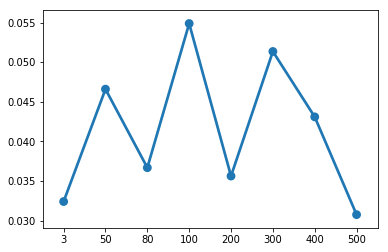

In [45]:
n_estimators_list=[3,50,80,100,200,300,400,500]
Prep_models_Original2=[AdaBoostRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

# BaggingRegressor+DecisionTree with diverse n_estimators

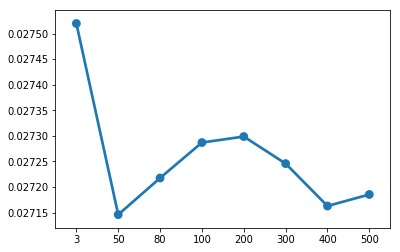

In [42]:
n_estimators_list=[3,50,80,100,200,300,400,500]
Prep_models_Original2=[BaggingRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

# AdaBoostingRegressor+RandomForest with diverse n_estimators

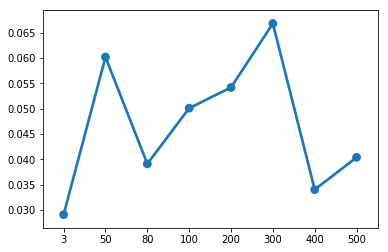

In [36]:
n_estimators_list=[3,50,80,100,200,300,400,500]
Prep_models_Original2=[AdaBoostRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

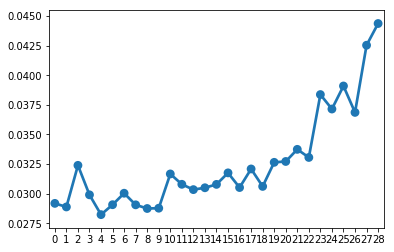

In [33]:
n_estimators_list=[i for i in range(1,30)]
Prep_models_Original2=[AdaBoostRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

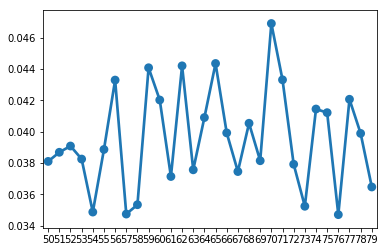

In [38]:
n_estimators_list=[i for i in range(50,80)]
Prep_models_Original2=[AdaBoostRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=10)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

# BaggingRegressor+RandomForest with diverse n_estimators

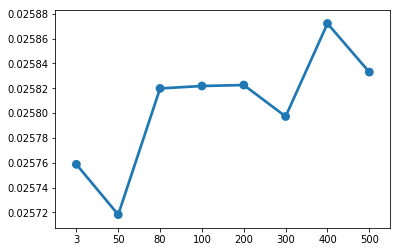

In [40]:
n_estimators_list=[3,50,80,100,200,300,400,500]
Prep_models_Original2=[BaggingRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

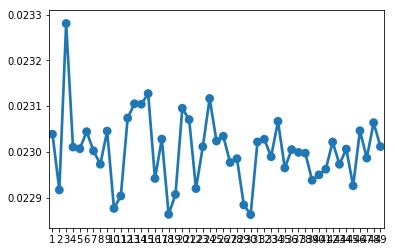

In [41]:
n_estimators_list=[i for i in range(1,50)]
Prep_models_Original2=[BaggingRegressor(RandomForestRegressor(max_depth=4),n_estimators=i) for i in n_estimators_list]
test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=1)

##############################Point Plot##############################
TrainedModellist=test_movie2
listScore=[]
listModel=[]
for i in range(0,len(TrainedModellist)):
    listScore.append(TrainedModellist[i][1])
for i in range(0,len(TrainedModellist)):
    #listModel.append(str(TrainedModellist[i][0]).split("(")[0])
    #listModel.append(str(TrainedModellist[i][0])[0:5])
    listModel.append(str(TrainedModellist[i][0])[0:5])
sns.pointplot(x=[i for i in n_estimators_list], y=listScore);
##############################Point Plot##############################

# Comparison Between Different Regressors (Ada&Bagging-RandomForest)

In [102]:
Prep_models_Original2=[SVR(), LinearSVR(),RandomForestRegressor(),
                       GradientBoostingRegressor(),
                       AdaBoostRegressor(RandomForestRegressor(max_depth=4),n_estimators=400),
                       BaggingRegressor(RandomForestRegressor(max_depth=4),n_estimators=400), 
                       DecisionTreeRegressor(max_depth=4)]


test_movie2=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original2,n=3)

In [103]:
test_movie2

[[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  0.049712006395243515],
 [LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
       intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
       random_state=None, tol=0.0001, verbose=0), 0.036354828919298414],
 [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False),
  0.023188057862007044],
 [GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
               max_leaf_nodes=None, min_i

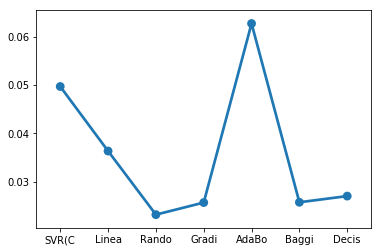

In [104]:
GetModelGraph(test_movie2)

# Comparison Between Different Regressors (Ada&Bagging-LinearRegressor)

In [105]:
Prep_models_Original3=[SVR(), LinearSVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(LinearRegression()),BaggingRegressor(LinearRegression()),DecisionTreeRegressor(max_depth=3)]


test_movie3=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original3,n=3)

In [106]:
test_movie3

[[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  0.0495756697393352],
 [LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
       intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
       random_state=None, tol=0.0001, verbose=0), 0.036517550855921586],
 [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False),
  0.022995993442913365],
 [GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
               max_leaf_nodes=None, min_imp

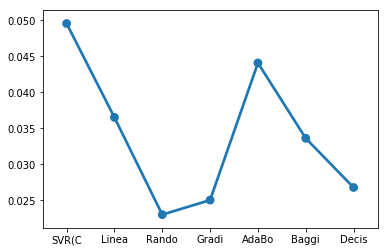

In [107]:
GetModelGraph(test_movie3)

# Comparison Between Different Regressors (Ada&Bagging-DecisionTreeRegressor)

In [108]:
Prep_models_Original4=[SVR(), LinearSVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400),BaggingRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400),DecisionTreeRegressor(max_depth=3)]


test_movie4=Train_Model_list_NTrainSet(dfmovie,0.8,Prep_models_Original4,n=3)

In [109]:
test_movie4

[[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
  0.051261682173277014],
 [LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
       intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
       random_state=None, tol=0.0001, verbose=0), 0.038185919264421421],
 [RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0, warm_start=False),
  0.023617741367385994],
 [GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
               max_leaf_nodes=None, min_i

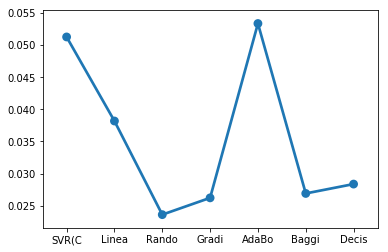

In [110]:
GetModelGraph(test_movie4)

# Plot results

In [32]:
revenue_cleanned

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Movie_Name,Week_Number,Year,Month,Day,Revenue,NGross_to_Date,NWeekly_Gross
0,0,-0.643765,-0.353895,0.188243,-0.526726,0.109456,-0.040500,-0.716574,0.125703,0.237249,-0.867337,10 Cloverfield Lane,-7,2016,1,15,71.90,0.000000,0.000000
1,1,-0.643714,-0.353810,0.187965,-0.526875,0.109262,-0.040846,-0.716380,0.125832,0.237146,-0.867022,10 Cloverfield Lane,-6,2016,1,22,71.90,0.000000,0.000000
2,2,-0.643716,-0.353814,0.187976,-0.526869,0.109270,-0.040832,-0.716388,0.125827,0.237150,-0.867035,10 Cloverfield Lane,-5,2016,1,29,71.90,0.000000,0.000000
3,3,-0.643878,-0.354084,0.188862,-0.526395,0.109886,-0.039731,-0.717004,0.125414,0.237479,-0.868037,10 Cloverfield Lane,-4,2016,2,5,71.90,0.000000,0.000000
4,4,-0.644287,-0.354768,0.191101,-0.525199,0.111443,-0.036950,-0.718561,0.124370,0.238309,-0.870569,10 Cloverfield Lane,-3,2016,2,12,71.90,0.000000,0.000000
5,5,-0.645115,-0.356151,0.195629,-0.522779,0.114593,-0.031324,-0.721712,0.122259,0.239988,-0.875690,10 Cloverfield Lane,-2,2016,2,19,71.90,0.000000,0.000000
6,6,-0.646814,-0.358991,0.204926,-0.517811,0.121060,-0.019774,-0.728179,0.117924,0.243436,-0.886206,10 Cloverfield Lane,-1,2016,2,26,71.90,0.000000,0.000000
7,7,-0.646529,-0.358515,0.203367,-0.518644,0.119976,-0.021711,-0.727094,0.118651,0.242858,-0.884442,10 Cloverfield Lane,0,2016,3,4,71.90,0.000000,0.000000
8,8,-0.647553,-0.360206,0.208823,-0.515702,0.123795,-0.014906,-0.730891,0.116059,0.244908,-0.890691,10 Cloverfield Lane,1,2016,3,11,71.90,0.034886,0.083603
9,9,-0.648996,-0.362632,0.216800,-0.511451,0.129332,-0.005006,-0.736440,0.112362,0.247854,-0.899676,10 Cloverfield Lane,2,2016,3,18,71.90,0.053393,0.044349


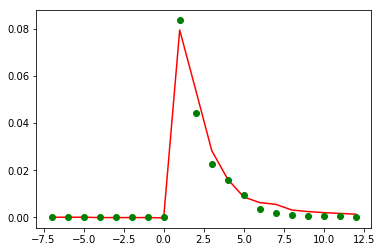

In [34]:
actual_xaxis=revenue_cleanned['Week_Number'][revenue_cleanned['Movie_Name']=='10 Cloverfield Lane']
actual_yaxis=revenue_cleanned['NWeekly_Gross'][revenue_cleanned['Movie_Name']=='10 Cloverfield Lane']

#predict_yaxis=[]
X,y=revenue_cleanned.drop(['NWeekly_Gross','Unnamed: 0'],axis=1),revenue_cleanned['NWeekly_Gross']
dfpredict=X[X['Movie_Name']=='10 Cloverfield Lane']
dfpredict=dfpredict.drop(['Movie_Name'],axis=1)

i=3
#test_movie4[i][0]
res_test_movie4=test_movie4[i][0].predict(dfpredict)

plt.plot(actual_xaxis,res_test_movie4,'r-',actual_xaxis,actual_yaxis,'go')

In [52]:
i=4
test_movie4[i][0]

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=None)

In [50]:
res_test_movie4

array([  2.53939977e-06,   2.53939977e-06,   2.53939977e-06,
         2.53939977e-06,   2.53939977e-06,  -1.78131441e-04,
         2.53939977e-06,   2.53939977e-06,   7.77918583e-02,
         4.52266866e-02,   2.39313893e-02,   1.89178509e-02,
         1.12914001e-02,   5.39719717e-03,   5.33528098e-03,
         1.73290552e-03,   1.73290552e-03,  -3.21315600e-04,
        -3.21315600e-04,  -1.31847907e-03])

In [48]:
dfpredict

,0,1,2,3,4,5,6,7,8,9,Week_Number,Year,Month,Day,Revenue,NGross_to_Date
0,-0.644744,-0.355858,0.194650,-0.523851,0.111737,-0.035826,-0.722587,0.107126,0.237933,-0.873118,-7,2016,1,15,71.9,0.000000
1,-0.644721,-0.355975,0.194531,-0.523815,0.111802,-0.035700,-0.722722,0.107031,0.237954,-0.873306,-6,2016,1,22,71.9,0.000000
2,-0.644632,-0.356447,0.194046,-0.523671,0.112069,-0.035194,-0.723271,0.106646,0.238042,-0.874071,-5,2016,1,29,71.9,0.000000
3,-0.644657,-0.356325,0.194171,-0.523708,0.112001,-0.035326,-0.723129,0.106745,0.238021,-0.873876,-4,2016,2,5,71.9,0.000000
4,-0.644601,-0.356611,0.193876,-0.523620,0.112162,-0.035016,-0.723462,0.106512,0.238073,-0.874336,-3,2016,2,12,71.9,0.000000
5,-0.644455,-0.357365,0.193101,-0.523390,0.112588,-0.034204,-0.724338,0.105898,0.238212,-0.875555,-2,2016,2,19,71.9,0.000000
6,-0.644580,-0.356719,0.193765,-0.523587,0.112223,-0.034900,-0.723588,0.106423,0.238093,-0.874513,-1,2016,2,26,71.9,0.000000
7,-0.644568,-0.356777,0.193705,-0.523570,0.112256,-0.034837,-0.723655,0.106377,0.238103,-0.874605,0,2016,3,4,71.9,0.000000
8,-0.644205,-0.358753,0.191646,-0.522968,0.113362,-0.032746,-0.725925,0.104759,0.238472,-0.877801,1,2016,3,11,71.9,0.034886
9,-0.644115,-0.358912,0.191484,-0.522926,0.113443,-0.032505,-0.726118,0.104643,0.238474,-0.877999,2,2016,3,18,71.9,0.053393


# Testing Untrained Movie

In [ ]:
AfterTrainedModelMean=[]
#Original Dataset: revenue_cleanned
for j in range(0,n):
    X,y=dfSample.drop(['NWeekly_Gross','Movie_Name'],axis=1),dfSample['NWeekly_Gross']
    train_X, test_X, train_y, test_y = train_test_split(X,y, train_size=rate, test_size=(1-rate))
    
    DataSetListT=[train_X, test_X, train_y, test_y]
    AfterTrainedModel=[]
    for i in range(0,len(Model_should_be_trained)):
        AfterTrainedModel.append(TrainAndGetScores_RMSPE(DataSetListT,Model_should_be_trained[i]))
    AfterTrainedModelMean.append(AfterTrainedModel)
ReturnMean=[]
for i in range (0,len(Model_should_be_trained)):
    mean=[]
    for j in range(0,n):
        mean.append(AfterTrainedModelMean[j][i][1])
    ReturnMean.append([AfterTrainedModelMean[0][i][0],np.mean(mean)])

In [42]:
revenue_cleanned333=revenue_cleanned.drop(["Unnamed: 0"],axis=1)

In [74]:
revenue_cleanned333[19011:]

,0,1,2,3,4,5,6,7,8,9,Movie_Name,Week_Number,Year,Month,Day,Revenue,NGross_to_Date,NWeekly_Gross
19011,0.579052,0.906816,-0.273360,-0.449352,-0.350762,0.356384,-0.031041,0.050544,-0.257225,0.075170,Your Highness,-7,2011,2,11,21.56,0.000000,0.000000
19012,0.579040,0.906797,-0.273295,-0.449317,-0.350717,0.356465,-0.031087,0.050514,-0.257201,0.075096,Your Highness,-6,2011,2,18,21.56,0.000000,0.000000
19013,0.579116,0.906923,-0.273708,-0.449538,-0.351005,0.355951,-0.030799,0.050707,-0.257355,0.075564,Your Highness,-5,2011,2,25,21.56,0.000000,0.000000
19014,0.578857,0.906490,-0.272292,-0.448781,-0.350019,0.357710,-0.031784,0.050047,-0.256829,0.073962,Your Highness,-4,2011,3,4,21.56,0.000000,0.000000
19015,0.577943,0.904963,-0.267291,-0.446109,-0.346541,0.363923,-0.035263,0.047715,-0.254975,0.068306,Your Highness,-3,2011,3,11,21.56,0.000000,0.000000
19016,0.577339,0.903953,-0.263987,-0.444343,-0.344242,0.368028,-0.037561,0.046174,-0.253749,0.064569,Your Highness,-2,2011,3,18,21.56,0.000000,0.000000
19017,0.577261,0.903822,-0.263559,-0.444114,-0.343945,0.368560,-0.037859,0.045975,-0.253591,0.064085,Your Highness,-1,2011,3,25,21.56,0.000000,0.000000
19018,0.575927,0.901593,-0.256261,-0.440215,-0.338869,0.377626,-0.042935,0.042572,-0.250884,0.055831,Your Highness,0,2011,4,1,21.56,0.000000,0.000000
19019,0.575679,0.901187,-0.254967,-0.439511,-0.337958,0.379246,-0.043836,0.041947,-0.250392,0.054332,Your Highness,1,2011,4,8,21.56,0.012873,0.030850
19020,0.576768,0.903001,-0.260887,-0.442681,-0.342081,0.371886,-0.039718,0.044718,-0.252594,0.061046,Your Highness,2,2011,4,15,21.56,0.019279,0.015351


In [44]:
#test_HS=dfmovie
test_HS2=revenue_cleanned333.drop(['Movie_Name'],axis=1)

In [45]:
test_HS2[19011:]

,0,1,2,3,4,5,6,7,8,9,Week_Number,Year,Month,Day,Revenue,NGross_to_Date,NWeekly_Gross
10924,0.681975,-0.406400,0.500545,0.123506,0.712728,0.022638,-0.716456,-0.545836,-0.220232,-0.092702,-3,2016,6,3,79.00,0.000000,0.000000
10925,0.680053,-0.409612,0.511061,0.129126,0.720043,0.035702,-0.723771,-0.550739,-0.216332,-0.104595,-2,2016,6,10,79.00,0.000000,0.000000
10926,0.680264,-0.409260,0.509906,0.128508,0.719239,0.034267,-0.722968,-0.550200,-0.216761,-0.103288,-1,2016,6,17,79.00,0.000000,0.000000
10927,0.679769,-0.410087,0.512616,0.129957,0.721125,0.037634,-0.724853,-0.551464,-0.215756,-0.106354,0,2016,6,24,79.00,0.000000,0.000000
10928,0.678903,-0.411500,0.517103,0.132401,0.724289,0.043256,-0.727977,-0.553640,-0.214045,-0.111564,1,2016,7,1,79.00,0.049549,0.118740
10929,0.678936,-0.411475,0.517101,0.132372,0.724261,0.043227,-0.727975,-0.553589,-0.214073,-0.111479,2,2016,7,8,79.00,0.069312,0.047361
10930,0.677993,-0.413051,0.522287,0.135135,0.727861,0.049660,-0.731582,-0.555991,-0.212159,-0.117320,3,2016,7,15,79.00,0.079263,0.023847
10931,0.679444,-0.410628,0.514367,0.130899,0.722348,0.039817,-0.726072,-0.552292,-0.215100,-0.108353,4,2016,7,22,79.00,0.082904,0.008727
10932,0.680580,-0.408730,0.508155,0.127578,0.718026,0.032097,-0.721750,-0.549394,-0.217404,-0.101324,5,2016,7,29,79.00,0.083982,0.002584
10933,0.681270,-0.407577,0.504387,0.125563,0.715404,0.027414,-0.719129,-0.547634,-0.218804,-0.097057,6,2016,8,5,79.00,0.084269,0.000686


In [84]:
train_HS=test_HS2[:19025]
testX_HS=test_HS2[19025:]

In [85]:
X,y=train_HS.drop(['NWeekly_Gross'],axis=1),train_HS['NWeekly_Gross']
rm=AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400)
rm.fit(X,y)
X_ttest,y_ttest=testX_HS.drop(['NWeekly_Gross'],axis=1),testX_HS['NWeekly_Gross']
RM_model=rm.predict(X_ttest)

0.0236198662457


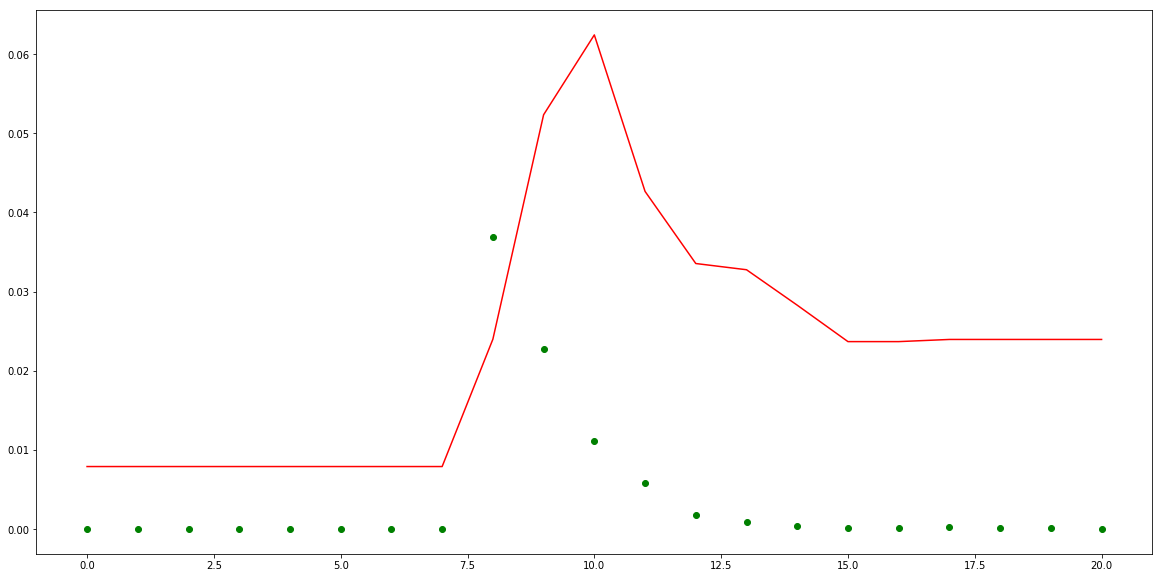

In [86]:
plt.plot(range(0,len(RM_model)),RM_model,'r-',range(0,len(RM_model)),y_ttest,'go')
print(RMSPE(RM_model,y_ttest))

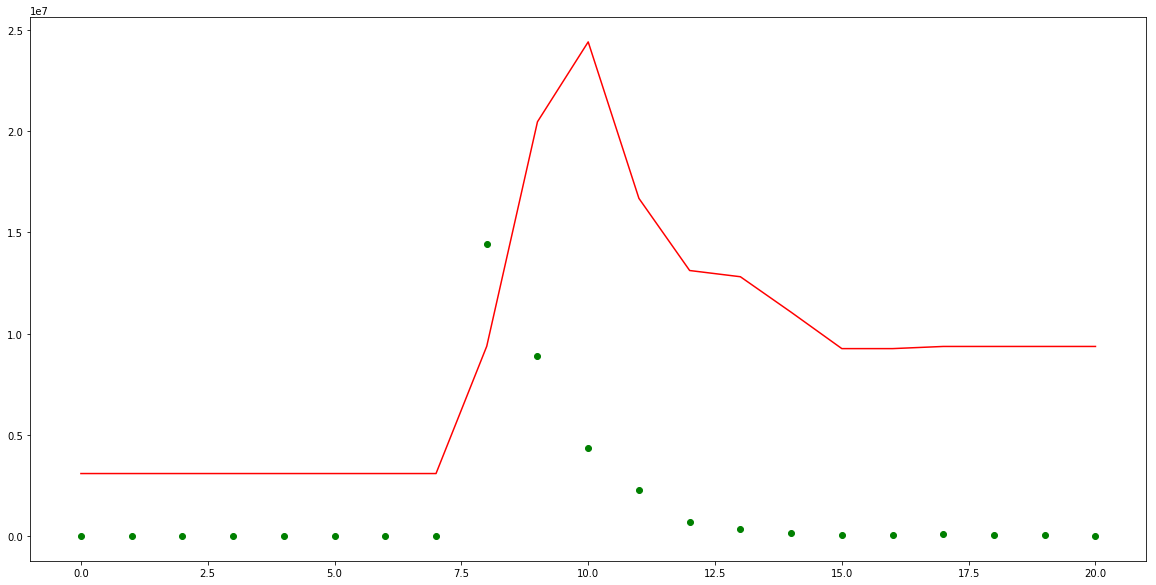

In [87]:
plt.plot(range(0,len(RM_model)),np.array(RM_model)*390856054,'r-',range(0,len(RM_model)),np.array(y_ttest)*390856054,'go')